Trying to perform linear regression on movie data

In [1]:
import sys
sys.path.append("..")

from reader import generic_reader
import pandas as pd
import ast  # Abstract Syntax Trees - safely parse string list to Python list
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
danish_actors = generic_reader.read_csv_file_to_data_frame("../movie_data/danish_actors.csv")
print(danish_actors.info())
danish_actors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15602 entries, 0 to 15601
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   actor_id              15602 non-null  int64  
 1   movie_ids             15602 non-null  object 
 2   adult                 15602 non-null  bool   
 3   also_known_as         15602 non-null  object 
 4   biography             1067 non-null   object 
 5   birthday              4257 non-null   object 
 6   deathday              1189 non-null   object 
 7   gender                15602 non-null  int64  
 8   homepage              449 non-null    object 
 9   imdb_id               7569 non-null   object 
 10  known_for_department  15602 non-null  object 
 11  name                  15602 non-null  object 
 12  place_of_birth        3276 non-null   object 
 13  popularity            15602 non-null  float64
 14  profile_path          4702 non-null   object 
dtypes: bool(1), float64

,actor_id,movie_ids,adult,also_known_as,biography,birthday,deathday,gender,homepage,imdb_id,known_for_department,name,place_of_birth,popularity,profile_path
0,42,"{658817, 456325, 29445, 1354636, 752908, 14460...",False,"['Ларс фон Триер', '拉斯·馮·提爾', 'ラース・フォン・トリアー', ...",Lars von Trier (born Lars Trier; 30 April 1956...,1956-04-30,NaN,2,NaN,nm0001885,Directing,Lars von Trier,"Kongens Lyngby, Danmark",0.9635,/a1zVySI0Yqqf3ORegQ1icMfvhAa.jpg
1,53,{15843},False,"['Rolf Peter Ingvar Storm', 'پیتر استورماره', ...","Peter Stormare (August 27, 1953) was born in A...",1953-08-27,NaN,2,NaN,nm0001780,Acting,Peter Stormare,"Arbrå, Gävleborgs län, Sweden",5.0311,/1rtpuUqBV29jDc1huUhtjGDbEwn.jpg
2,169,{8883},False,[],Hanns Zischler (born 18 June 1947) is a German...,1947-06-18,NaN,2,NaN,nm0957193,Acting,Hanns Zischler,"Nuremberg, Bavaria, Germany",0.2330,/5O4Dum1OuKI4RMB24xjACkL22iA.jpg
3,378,{266285},False,"['Джонатан Прайс', '조너선 프라이스', '乔纳森·普雷斯', 'جان...","Jonathan Pryce, CBE (born 1 June 1947) is a We...",1947-06-01,NaN,2,NaN,nm0000596,Acting,Jonathan Pryce,"Carmel, Flintshire, Wales, UK",2.1896,/zwSv5uXzPTtmitFe39UdqnVwmdL.jpg
4,380,{214137},False,"['Robert DeNiro', ' Robert Anthony De Niro Jr....","Robert Anthony De Niro (born August 17, 1943) ...",1943-08-17,NaN,2,NaN,nm0000134,Acting,Robert De Niro,"Greenwich Village, New York City, New York, USA",3.2940,/cT8htcckIuyI1Lqwt1CvD02ynTh.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15597,5706360,{1154066},False,[],NaN,NaN,NaN,0,NaN,NaN,Acting,Thea Esther Saniel Thomsen,NaN,0.0000,NaN
15598,5706385,{1154066},False,[],NaN,NaN,NaN,0,NaN,NaN,Acting,Morten Jay Jakobsen,NaN,0.0000,NaN
15599,5706390,{1154066},False,[],NaN,NaN,NaN,0,NaN,NaN,Acting,Frederik Rasted,NaN,0.0000,NaN
15600,5706467,{1019835},False,[],NaN,NaN,NaN,0,NaN,NaN,Acting,Jytte Vikkelsøe,NaN,0.0000,NaN


In [3]:
danish_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15602 entries, 0 to 15601
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   actor_id              15602 non-null  int64  
 1   movie_ids             15602 non-null  object 
 2   adult                 15602 non-null  bool   
 3   also_known_as         15602 non-null  object 
 4   biography             1067 non-null   object 
 5   birthday              4257 non-null   object 
 6   deathday              1189 non-null   object 
 7   gender                15602 non-null  int64  
 8   homepage              449 non-null    object 
 9   imdb_id               7569 non-null   object 
 10  known_for_department  15602 non-null  object 
 11  name                  15602 non-null  object 
 12  place_of_birth        3276 non-null   object 
 13  popularity            15602 non-null  float64
 14  profile_path          4702 non-null   object 
dtypes: bool(1), float64

In [4]:
# Step 1: Convert 'birthday' and 'deathday' to datetime format (if it's not already)
danish_actors['birthday'] = pd.to_datetime(danish_actors['birthday'])
danish_actors['deathday'] = pd.to_datetime(danish_actors['deathday'])

In [5]:
danish_actors

,actor_id,movie_ids,adult,also_known_as,biography,birthday,deathday,gender,homepage,imdb_id,known_for_department,name,place_of_birth,popularity,profile_path
0,42,"{658817, 456325, 29445, 1354636, 752908, 14460...",False,"['Ларс фон Триер', '拉斯·馮·提爾', 'ラース・フォン・トリアー', ...",Lars von Trier (born Lars Trier; 30 April 1956...,1956-04-30,NaT,2,NaN,nm0001885,Directing,Lars von Trier,"Kongens Lyngby, Danmark",0.9635,/a1zVySI0Yqqf3ORegQ1icMfvhAa.jpg
1,53,{15843},False,"['Rolf Peter Ingvar Storm', 'پیتر استورماره', ...","Peter Stormare (August 27, 1953) was born in A...",1953-08-27,NaT,2,NaN,nm0001780,Acting,Peter Stormare,"Arbrå, Gävleborgs län, Sweden",5.0311,/1rtpuUqBV29jDc1huUhtjGDbEwn.jpg
2,169,{8883},False,[],Hanns Zischler (born 18 June 1947) is a German...,1947-06-18,NaT,2,NaN,nm0957193,Acting,Hanns Zischler,"Nuremberg, Bavaria, Germany",0.2330,/5O4Dum1OuKI4RMB24xjACkL22iA.jpg
3,378,{266285},False,"['Джонатан Прайс', '조너선 프라이스', '乔纳森·普雷斯', 'جان...","Jonathan Pryce, CBE (born 1 June 1947) is a We...",1947-06-01,NaT,2,NaN,nm0000596,Acting,Jonathan Pryce,"Carmel, Flintshire, Wales, UK",2.1896,/zwSv5uXzPTtmitFe39UdqnVwmdL.jpg
4,380,{214137},False,"['Robert DeNiro', ' Robert Anthony De Niro Jr....","Robert Anthony De Niro (born August 17, 1943) ...",1943-08-17,NaT,2,NaN,nm0000134,Acting,Robert De Niro,"Greenwich Village, New York City, New York, USA",3.2940,/cT8htcckIuyI1Lqwt1CvD02ynTh.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15597,5706360,{1154066},False,[],NaN,NaT,NaT,0,NaN,NaN,Acting,Thea Esther Saniel Thomsen,NaN,0.0000,NaN
15598,5706385,{1154066},False,[],NaN,NaT,NaT,0,NaN,NaN,Acting,Morten Jay Jakobsen,NaN,0.0000,NaN
15599,5706390,{1154066},False,[],NaN,NaT,NaT,0,NaN,NaN,Acting,Frederik Rasted,NaN,0.0000,NaN
15600,5706467,{1019835},False,[],NaN,NaT,NaT,0,NaN,NaN,Acting,Jytte Vikkelsøe,NaN,0.0000,NaN


In [6]:
# Step 1: Convert the string representation of list to actual list
danish_actors['movie_ids_list'] = danish_actors['movie_ids'].apply(ast.literal_eval)


# Step 2: Count the number of movie IDs
danish_actors['movie_count'] = danish_actors['movie_ids_list'].apply(len)

In [7]:
def calculate_age_from_row(row):
    birthday = row['birthday']
    deathday = row['deathday']
    
    if deathday is None:
        end_date = pd.to_datetime('2024-12-31')
    else:
        end_date = deathday
    
    age = end_date.year - birthday.year - ((end_date.month, end_date.day) < (birthday.month, birthday.day))
    return age

In [8]:
danish_actors['age'] = danish_actors.apply(calculate_age_from_row, axis=1)

In [9]:
danish_actors

,actor_id,movie_ids,adult,also_known_as,biography,birthday,deathday,gender,homepage,imdb_id,known_for_department,name,place_of_birth,popularity,profile_path,movie_ids_list,movie_count,age
0,42,"{658817, 456325, 29445, 1354636, 752908, 14460...",False,"['Ларс фон Триер', '拉斯·馮·提爾', 'ラース・フォン・トリアー', ...",Lars von Trier (born Lars Trier; 30 April 1956...,1956-04-30,NaT,2,NaN,nm0001885,Directing,Lars von Trier,"Kongens Lyngby, Danmark",0.9635,/a1zVySI0Yqqf3ORegQ1icMfvhAa.jpg,"{658817, 29445, 456325, 752908, 1354636, 14460...",23,NaN
1,53,{15843},False,"['Rolf Peter Ingvar Storm', 'پیتر استورماره', ...","Peter Stormare (August 27, 1953) was born in A...",1953-08-27,NaT,2,NaN,nm0001780,Acting,Peter Stormare,"Arbrå, Gävleborgs län, Sweden",5.0311,/1rtpuUqBV29jDc1huUhtjGDbEwn.jpg,{15843},1,NaN
2,169,{8883},False,[],Hanns Zischler (born 18 June 1947) is a German...,1947-06-18,NaT,2,NaN,nm0957193,Acting,Hanns Zischler,"Nuremberg, Bavaria, Germany",0.2330,/5O4Dum1OuKI4RMB24xjACkL22iA.jpg,{8883},1,NaN
3,378,{266285},False,"['Джонатан Прайс', '조너선 프라이스', '乔纳森·普雷斯', 'جان...","Jonathan Pryce, CBE (born 1 June 1947) is a We...",1947-06-01,NaT,2,NaN,nm0000596,Acting,Jonathan Pryce,"Carmel, Flintshire, Wales, UK",2.1896,/zwSv5uXzPTtmitFe39UdqnVwmdL.jpg,{266285},1,NaN
4,380,{214137},False,"['Robert DeNiro', ' Robert Anthony De Niro Jr....","Robert Anthony De Niro (born August 17, 1943) ...",1943-08-17,NaT,2,NaN,nm0000134,Acting,Robert De Niro,"Greenwich Village, New York City, New York, USA",3.2940,/cT8htcckIuyI1Lqwt1CvD02ynTh.jpg,{214137},1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15597,5706360,{1154066},False,[],NaN,NaT,NaT,0,NaN,NaN,Acting,Thea Esther Saniel Thomsen,NaN,0.0000,NaN,{1154066},1,NaN
15598,5706385,{1154066},False,[],NaN,NaT,NaT,0,NaN,NaN,Acting,Morten Jay Jakobsen,NaN,0.0000,NaN,{1154066},1,NaN
15599,5706390,{1154066},False,[],NaN,NaT,NaT,0,NaN,NaN,Acting,Frederik Rasted,NaN,0.0000,NaN,{1154066},1,NaN
15600,5706467,{1019835},False,[],NaN,NaT,NaT,0,NaN,NaN,Acting,Jytte Vikkelsøe,NaN,0.0000,NaN,{1019835},1,NaN


In [10]:
# import os
# output_folder = os.path.join(os.getcwd(), "movie_data")
# output_path = os.path.join(output_folder, "danish_actors_with_age.csv")
danish_actors.to_csv("../movie_data/danish_actors_with_age.csv", index=False)

In [11]:
actor = danish_actors[danish_actors['actor_id'] == 47150]
actor

,actor_id,movie_ids,adult,also_known_as,biography,birthday,deathday,gender,homepage,imdb_id,known_for_department,name,place_of_birth,popularity,profile_path,movie_ids_list,movie_count,age
466,47150,"{41985, 41987, 41989, 41990, 56858, 56864, 568...",False,['Dirch Hartvig Passer'],NaN,1926-05-18,1980-09-03,2,NaN,nm0664850,Acting,Dirch Passer,"København, Danmark",0.1338,/nQx8ZHDfvbE8G8yMJV8Burd5y73.jpg,"{41985, 41987, 41989, 41990, 56858, 56864, 568...",91,54.0


<Axes: xlabel='age', ylabel='movie_count'>

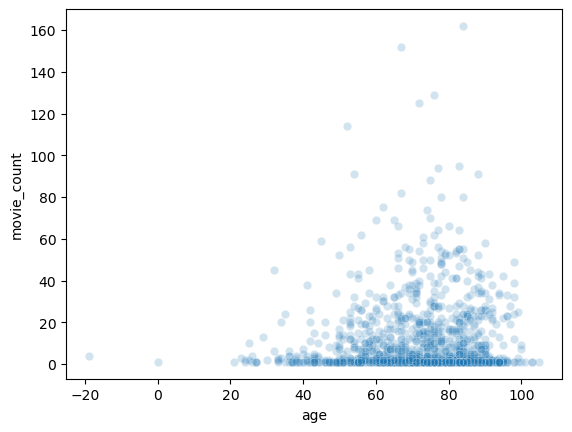

In [12]:
sns.scatterplot(data=danish_actors, x='age', y='movie_count', alpha=0.2)